# 영역 추정 (Region Proposal)

In [1]:
!pip install selectivesearch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.9 MB 9.3 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.9 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.9 MB 14.4 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.9 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 15.3 MB/s eta 0:00:00
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4382 sha256=af455ca0041b8d0b2c5481c89798813e57b52819d830d6fcca6a20b31edda7fb
  Stored in directory: c:\users\p

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import selectivesearch as ss

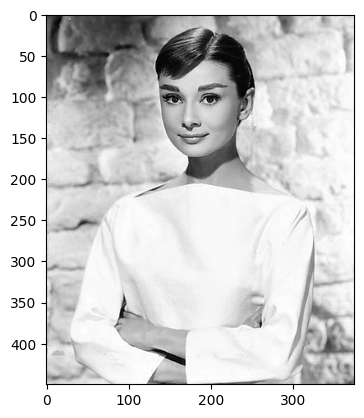

In [3]:
image = cv2.cvtColor(cv2.imread('audrey.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [4]:
img, regions = ss.selective_search(image, scale=100, min_size=2000)
regions

c:\Users\Playdata\anaconda3\envs\vectordb_env\lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]},
 {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]},
 {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]},
 {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]},
 {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]},
 {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]},
 {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]},
 {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]},
 {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]},
 {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]},
 {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]},
 {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]},
 {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]},
 {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]},
 {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]},
 {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]},


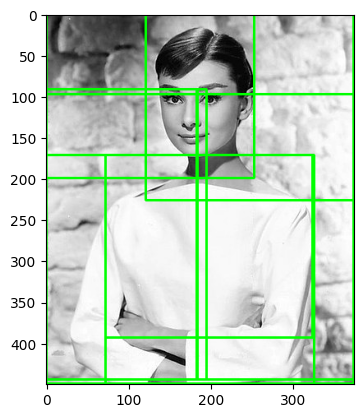

In [5]:
candidate_bnd_boxes = [region['rect'] for region in regions if region['size'] > 20000]

base_image = image.copy()

for candidate in candidate_bnd_boxes:
    x1, y1, width, height = candidate
    x2, y2 = x1+width, y1+height

    cv2.rectangle(base_image, (x1,y1), (x2,y2), color=(0,255,0), thickness=2)

plt.imshow(base_image)

In [6]:
def iou(candidate, ground_truth):
    x1 = np.maximum(candidate[0], ground_truth[0])
    y1 = np.maximum(candidate[1], ground_truth[1])
    x2 = np.maximum(candidate[2], ground_truth[2])
    y2 = np.maximum(candidate[3], ground_truth[3])
    intersection = np.maximum(0, x2-x1) * np.maximum(0, y2-y1)

    candidate_area = (candidate[2] - candidate[0]) * (candidate[3] - candidate[1])
    ground_truth_area = (ground_truth[2] - ground_truth[0]) * (ground_truth[3] - ground_truth[1])
    union = candidate_area + ground_truth_area - intersection

    return intersection / union

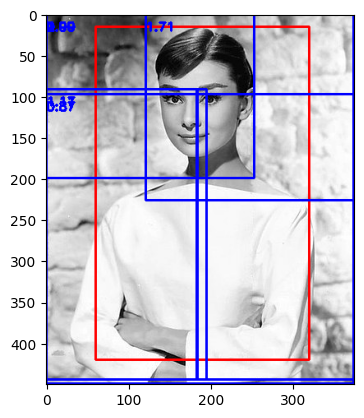

In [7]:
# 감지영역
candidate_bnd_boxes = [region['rect'] for region in regions if region['size'] > 20000]

# 정답영역
ground_truth_box = (60, 15, 320, 420)
gt_x1, gt_y1, gt_x2, gt_y2 = ground_truth_box

base_image = image.copy()
cv2.rectangle(base_image, (gt_x1,gt_y1), (gt_x2,gt_y2), color=(255,0,0), thickness=2)

for candidate in candidate_bnd_boxes:
    x1, y1, width, height = candidate
    x2, y2 = x1+width, y1+height

    iou_score = iou((x1, y1, x2, y2), ground_truth_box)

    if iou_score > 0.7:
        cv2.rectangle(base_image, (x1,y1), (x2,y2), color=(0,0,255), thickness=2)
        cv2.putText(base_image, f'{iou_score:.2f}', (x1,y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), thickness=2)

plt.imshow(base_image)

In [8]:
!pip install ultralytics

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 16.1 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 23.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.4 MB ? eta -:--:--
    --------------------------------------- 5.2/212.4 MB 26.6 MB/s eta 0:00:08
   - -------------------------------------- 9.7/212.4 MB 23.2 MB/s eta 0:00:09
   -- ------------------------------------- 12.3/212.4 MB 19.8 MB/s eta 0:00:11
   --- ------------------------------------ 16.3/212.4 MB 19.7 MB/s eta 0:00:10
   --- ------------------------------------ 20.7/212.4 MB 19.8 MB/s eta 0:00:10
   ---- ----------------------------------- 26.2/212.4 MB 20.8 MB/s eta 0:00:09
   ----- -------------------------------

In [9]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
result = model('birds.jpg', conf=0.6)
result[0].show()

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Playdata\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 c:\encore_skn11\08_llm\08_multi-modal\09_vision\birds.jpg: 480x640 4 birds, 96.5ms
Speed: 2.1ms preprocess, 96.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
